In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [9]:
titanic = pd.read_csv('train.csv')

In [10]:
titanic = titanic[["Survived", "Pclass", "Age", "Sex", "SibSp", "Parch", "Fare"]]

In [11]:
titanic

,Survived,Pclass,Age,Sex,SibSp,Parch,Fare
0,0,3,22.0,male,1,0,7.2500
1,1,1,38.0,female,1,0,71.2833
2,1,3,26.0,female,0,0,7.9250
3,1,1,35.0,female,1,0,53.1000
4,0,3,35.0,male,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,27.0,male,0,0,13.0000
887,1,1,19.0,female,0,0,30.0000
888,0,3,NaN,female,1,2,23.4500
889,1,1,26.0,male,0,0,30.0000


In [12]:
titanic["Age"].fillna(titanic["Age"].median(), inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_13608\761895934.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Age"].fillna(titanic["Age"].median(), inplace=True)


In [13]:
titanic["Sex"] = titanic["Sex"].map({"male": 0, "female": 1})

In [14]:
X = titanic.drop("Survived", axis=1)

In [15]:
y = titanic["Survived"]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model = DecisionTreeClassifier(random_state=42, max_depth=3)

In [18]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
y_pred = model.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)

In [21]:
print("Accuracy:", accuracy)


Accuracy: 0.7988826815642458


In [22]:
report = classification_report(y_test, y_pred, target_names=["Not Survived", "Survived"])

In [23]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

Not Survived       0.80      0.88      0.84       105
    Survived       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



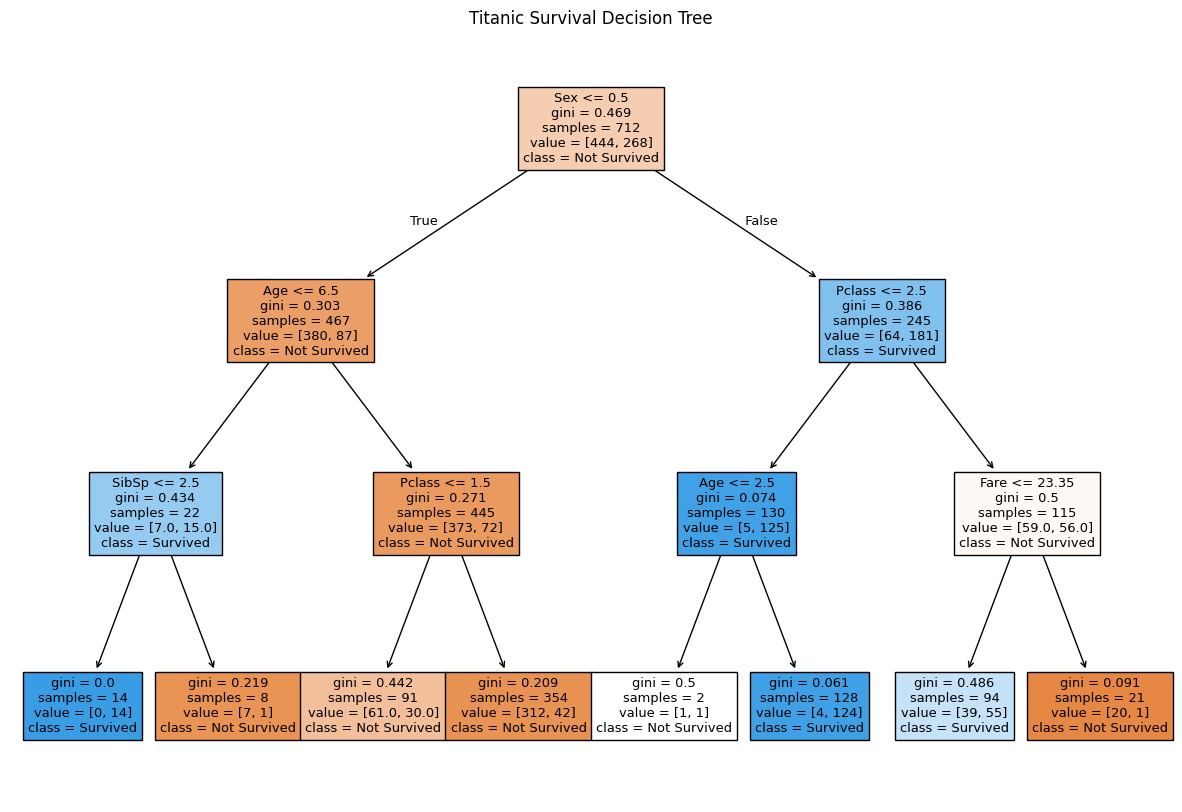

In [24]:
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.title("Titanic Survival Decision Tree")
plt.show()

In [25]:
text_tree = export_text(model, feature_names=list(X.columns))
print("Textual Representation of the Decision Tree:\n", text_tree)

Textual Representation of the Decision Tree:
 |--- Sex <= 0.50
|   |--- Age <= 6.50
|   |   |--- SibSp <= 2.50
|   |   |   |--- class: 1
|   |   |--- SibSp >  2.50
|   |   |   |--- class: 0
|   |--- Age >  6.50
|   |   |--- Pclass <= 1.50
|   |   |   |--- class: 0
|   |   |--- Pclass >  1.50
|   |   |   |--- class: 0
|--- Sex >  0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 2.50
|   |   |   |--- class: 0
|   |   |--- Age >  2.50
|   |   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- Fare <= 23.35
|   |   |   |--- class: 1
|   |   |--- Fare >  23.35
|   |   |   |--- class: 0

